## This notebook is for you to understand:
- Convolution with 1D examples
- Correlation with 1D examples
- Differences between convolution and correlation
- Padding
- What is really used in the CNN


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import scipy.signal as sig

%matplotlib inline

### Review the following examples and solve the Q0 to Q3

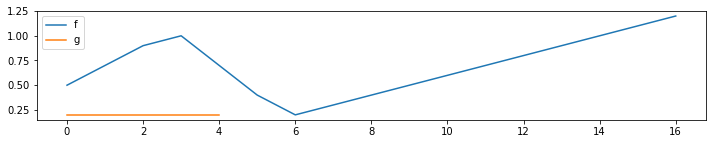

In [2]:
# set two signal f and g
f = np.hstack([np.arange(5,10,2), np.arange(10,2,-3),np.arange(2, 13,1)]) *0.1
g = np.ones(5) * 0.2
fig, ax = plt.subplots(1,1, figsize=(12,2))
ax.plot(np.arange(len(f)), f, label="f")
ax.plot(np.arange(len(g)), g, label="g")
ax.legend()


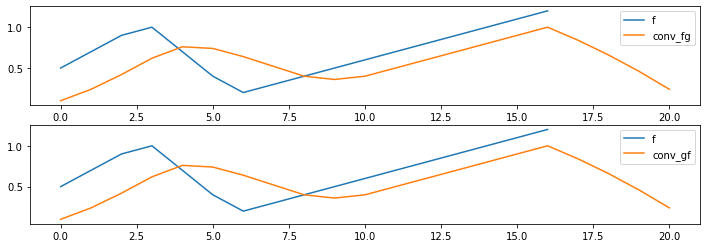

In [3]:
# Getting convolution result from f and g

conv_fg = np.convolve(f,g)
conv_gf = np.convolve(g,f)
fig, ax = plt.subplots(2,1, figsize=(12,4))

ax[0].plot(np.arange(len(f)), f, label="f")
ax[0].plot(conv_fg, label="conv_fg")
ax[1].plot(np.arange(len(f)), f, label="f")
ax[1].plot(conv_gf, label="conv_gf")
ax[0].legend()
ax[1].legend()

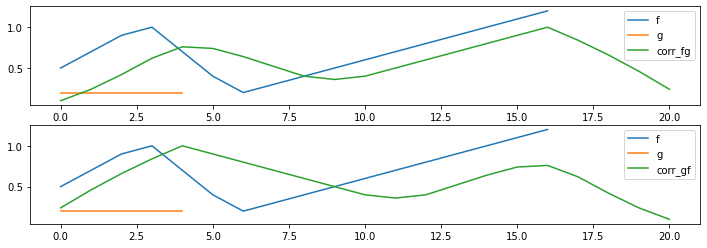

In [4]:
# Getting correlation result from f, g
corr_fg = np.correlate(f,g, mode="full")
corr_gf = np.correlate(g,f, mode="full")
fig, ax = plt.subplots(2,1, figsize=(12,4))

ax[0].plot(np.arange(len(f)), f, label="f")
ax[0].plot(np.arange(len(g)), g, label="g")
ax[0].plot(corr_fg, label="corr_fg")
ax[1].plot(np.arange(len(f)), f, label="f")
ax[1].plot(np.arange(len(g)), g, label="g")
ax[1].plot(corr_gf, label="corr_gf")
ax[0].legend()
ax[1].legend()

In [5]:
# compare the 4 results
results = np.vstack([conv_fg, conv_gf, corr_fg, corr_gf])
cols = [str(item) for item in range(len(conv_fg))]
results_df = pd.DataFrame(results, columns=cols, index=['conv_fg', 'conv_gf', 'corr_fg', 'corr_gf'])
results_df


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
conv_fg,0.10,0.24,0.42,0.62,0.76,0.74,0.64,0.52,0.4,0.36,...,0.50,0.6,0.70,0.80,0.90,1.00,0.84,0.66,0.46,0.24
conv_gf,0.10,0.24,0.42,0.62,0.76,0.74,0.64,0.52,0.4,0.36,...,0.50,0.6,0.70,0.80,0.90,1.00,0.84,0.66,0.46,0.24
corr_fg,0.10,0.24,0.42,0.62,0.76,0.74,0.64,0.52,0.4,0.36,...,0.50,0.6,0.70,0.80,0.90,1.00,0.84,0.66,0.46,0.24
corr_gf,0.24,0.46,0.66,0.84,1.00,0.90,0.80,0.70,0.6,0.50,...,0.36,0.4,0.52,0.64,0.74,0.76,0.62,0.42,0.24,0.10


### Q0: What do you get from the 4 results? What are the differences and why?

### Q1.1: Define function my_conv1d(signal, mask) and my_corr1d(signal, mask) using loops that gives the same results shown in the examples

In [7]:
def my_conv1d(signal, mask):
    # put your code here
    return output


In [ ]:
my_conv1d(f, g),conv_fg, my_conv1d(g,f), conv_gf

In [9]:
def my_corr1d(signal, mask):
    # put your code here
    return output

In [ ]:
my_corr1d(f, g),corr_fg, my_corr1d(g,f), corr_gf

### Q1.2 Verify your result with f, and g2 = [0.1, 0.3, 0.5, 0.7, 0.9]

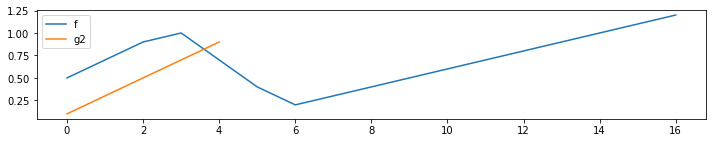

In [11]:
g2 = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
fig, ax = plt.subplots(1,1, figsize=(12,2))
ax.plot(np.arange(len(f)), f, label="f")
ax.plot(np.arange(len(g2)), g2, label="g2")
ax.legend()

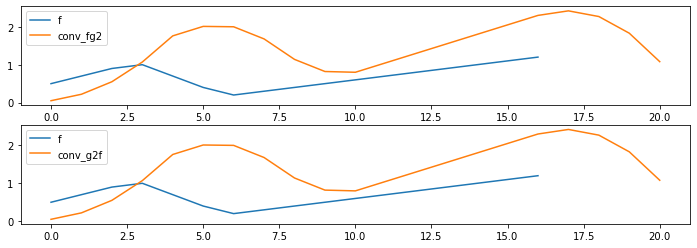

In [12]:
# Getting convolution result from f and g

conv_fg2 = np.convolve(f,g2)
conv_g2f = np.convolve(g2,f)
fig, ax = plt.subplots(2,1, figsize=(12,4))

ax[0].plot(np.arange(len(f)), f, label="f")
ax[0].plot(conv_fg2, label="conv_fg2")
ax[1].plot(np.arange(len(f)), f, label="f")
ax[1].plot(conv_g2f, label="conv_g2f")
ax[0].legend()
ax[1].legend()

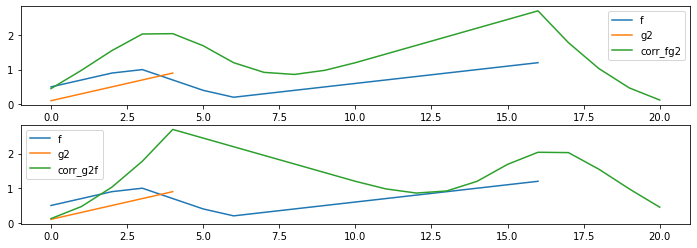

In [13]:
# Getting correlation result from f, g2
corr_fg2 = np.correlate(f,g2, mode="full")
corr_g2f = np.correlate(g2,f, mode="full")
fig, ax = plt.subplots(2,1, figsize=(12,4))

ax[0].plot(np.arange(len(f)), f, label="f")
ax[0].plot(np.arange(len(g2)), g2, label="g2")
ax[0].plot(corr_fg2, label="corr_fg2")
ax[1].plot(np.arange(len(f)), f, label="f")
ax[1].plot(np.arange(len(g2)), g2, label="g2")
ax[1].plot(corr_g2f, label="corr_g2f")
ax[0].legend()
ax[1].legend()

In [14]:
# compare the 4 results
results2 = np.vstack([conv_fg2, conv_g2f, corr_fg2, corr_g2f])
cols = [str(item) for item in range(len(conv_fg2))]
results2_df = pd.DataFrame(results2, columns=cols, index=['conv_fg2', 'conv_g2f', 'corr_fg2', 'corr_g2f'])
results2_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
conv_fg2,0.05,0.22,0.55,1.07,1.76,2.01,2.0,1.68,1.14,0.82,...,1.05,1.30,1.55,1.8,2.05,2.30,2.42,2.27,1.83,1.08
conv_g2f,0.05,0.22,0.55,1.07,1.76,2.01,2.0,1.68,1.14,0.82,...,1.05,1.30,1.55,1.8,2.05,2.30,2.42,2.27,1.83,1.08
corr_fg2,0.45,0.98,1.55,2.03,2.04,1.69,1.2,0.92,0.86,0.98,...,1.45,1.70,1.95,2.2,2.45,2.70,1.78,1.03,0.47,0.12
corr_g2f,0.12,0.47,1.03,1.78,2.70,2.45,2.2,1.95,1.70,1.45,...,0.98,0.86,0.92,1.2,1.69,2.04,2.03,1.55,0.98,0.45


In [ ]:
my_conv1d(f, g2),conv_fg2, my_conv1d(g2,f), conv_g2f

In [ ]:
my_corr1d(f, g2),corr_fg2, my_corr1d(g2,f), corr_g2f

### Q1.3 Why 'conv_fg2', 'corr_fg2' gives different results now (compared to the examples given in Q0)

### Q2 create a new functions based on the functions you defined in the Q1, adding argument for padding options (full, same, 'valid'). Reference: https://numpy.org/doc/stable/reference/generated/numpy.convolve.html#numpy.convolve, validate with (f,g2), (g2,f), (f, g3), (g3, f) 

In [17]:
g3 = g2[:4]

In [18]:
def my_conv1d_padding(signal, mask, mode='full'):
    # put your code here
    return output

In [ ]:
my_conv1d_padding(f, g2, mode='full'), np.convolve(f,g2), my_conv1d_padding(g2, f, mode='full'), np.convolve(g2,f)

In [ ]:
my_conv1d_padding(f, g3, mode='full'), np.convolve(f,g3), my_conv1d_padding(g3, f, mode='full'), np.convolve(g3,f)

In [ ]:
np.convolve(g2,f,mode='same'), my_conv1d_padding(g2,f, mode='same'), np.convolve(f,g2,mode='same'), my_conv1d_padding(f,g2, mode='same')

In [ ]:
np.convolve(g3,f,mode='same'), my_conv1d_padding(g3,f, mode='same'), np.convolve(f,g3,mode='same'), my_conv1d_padding(f,g3, mode='same')

In [ ]:
np.convolve(g2,f,mode='valid'), my_conv1d_padding(g2,f, mode='valid'), np.convolve(f,g2,mode='valid'), my_conv1d_padding(f,g2, mode='valid')

In [ ]:
np.convolve(g3,f,mode='valid'), my_conv1d_padding(g3,f, mode='valid'), np.convolve(f,g3,mode='valid'), my_conv1d_padding(f,g3, mode='valid')

In [25]:
def my_corr1d_padding(signal, mask, mode='full'):
    # put your code here
    return output

In [ ]:
my_corr1d_padding(f, g2, mode='full'), np.correlate(f,g2, mode='full'), my_corr1d_padding(g2, f, mode='full'), np.correlate(g2,f, mode='full')

In [ ]:
my_corr1d_padding(f, g3, mode='full'), np.correlate(f,g3, mode='full'), my_corr1d_padding(g3, f, mode='full'), np.correlate(g3,f, mode='full')

In [ ]:
my_corr1d_padding(f, g2, mode='same'), np.correlate(f,g2, mode='same'), my_corr1d_padding(g2, f, mode='same'), np.correlate(g2,f, mode='same')

In [ ]:
my_corr1d_padding(f, g3, mode='same'), np.correlate(f,g3, mode='same'), my_corr1d_padding(g3, f, mode='same'), np.correlate(g3,f, mode='same')

In [ ]:
my_corr1d_padding(f, g2, mode='valid'), np.correlate(f,g2, mode='valid'), my_corr1d_padding(g2, f, mode='valid'), np.correlate(g2,f, mode='valid')

In [ ]:
my_corr1d_padding(f, g3, mode='valid'), np.correlate(f,g3, mode='valid'), my_corr1d_padding(g3, f, mode='valid'), np.correlate(g3,f, mode='valid')

### Q3 What is really used in the CNN, comparing the results from convolution and correlation

In [39]:
input_shape = (1, len(f), 1)
x = tf.convert_to_tensor(np.expand_dims(f,axis=(0,2)))
filter = tf.keras.layers.Conv1D(1, 3, activation='relu', input_shape=input_shape[1:], use_bias=False, padding='same')
y = filter(x)
y = y.numpy().squeeze()
y[:5]

array([0.5852651 , 0.60157275, 0.6938156 , 0.5728337 , 0.22842018],
      dtype=float32)

In [40]:
weights = filter.get_weights()[0].squeeze()
weights

array([-0.37641406,  0.65268254,  0.36989117], dtype=float32)

In [41]:
conv_fw = np.convolve(f,weights, mode='same')
conv_wf = np.convolve(weights,f, mode='same')
corr_fw = np.correlate(f,weights, mode='same')
corr_wf = np.correlate(weights, f, mode='same')
# compare the 4 results
results_tf = np.vstack([conv_fw, conv_wf, corr_fw, corr_wf])
cols = [str(item) for item in range(len(conv_fw))]
results_tf_df = pd.DataFrame(results_tf, columns=cols, index=['conv_fw', 'conv_wf', 'corr_fw', 'corr_wf'])
results_tf_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
conv_fw,0.062851,0.303051,0.469924,0.722095,0.676203,0.444714,0.165569,0.119217,0.183833,0.248449,0.313065,0.377681,0.442297,0.506913,0.571529,0.636145,1.190099
conv_wf,0.062851,0.303051,0.469924,0.722095,0.676203,0.444714,0.165569,0.119217,0.183833,0.248449,0.313065,0.377681,0.442297,0.506913,0.571529,0.636145,1.190099
corr_fw,0.585265,0.601573,0.693816,0.572834,0.228420,0.071561,0.090938,0.268478,0.333094,0.397710,0.462326,0.526942,0.591558,0.656174,0.720790,0.785406,0.369164
corr_wf,0.369164,0.785406,0.720790,0.656174,0.591558,0.526942,0.462326,0.397710,0.333094,0.268478,0.090938,0.071561,0.228420,0.572834,0.693816,0.601573,0.585265


### 2D examples

In [42]:
input_shape = (1, 10, 10, 1)
x = tf.random.normal(input_shape)
filter2d = tf.keras.layers.Conv2D(1, 3, input_shape=input_shape[1:],use_bias=False, padding='same')
y = filter2d(x)
y = y.numpy().squeeze()
x = x.numpy().squeeze()
x[:4,:4], y[:4,:4] 

(array([[ 0.6241813 ,  0.7543467 , -1.4971762 , -0.30506015],
        [-1.2704004 ,  0.59785783, -0.53620684, -0.62239367],
        [-0.3011597 ,  0.9037912 ,  0.688331  , -1.6075299 ],
        [ 0.34371024,  0.3651999 ,  0.4853648 , -0.10377093]],
       dtype=float32),
 array([[-0.29376587,  0.444252  , -1.6652957 ,  0.04000931],
        [ 0.20600913,  1.7685298 , -1.9087884 , -0.74304414],
        [-0.17662321,  1.1535163 , -0.4147251 , -1.3978662 ],
        [ 0.5953109 ,  0.3433256 , -0.27419877, -1.2261064 ]],
       dtype=float32))

In [43]:
weights2d = filter2d.get_weights()[0].squeeze()
weights2d

array([[-0.21732277,  0.3768264 ,  0.21355677],
       [-0.56960326,  0.3319708 , -0.12626523],
       [-0.23944962,  0.5683081 ,  0.5289732 ]], dtype=float32)

In [44]:
sig.convolve2d(x, weights2d, mode='same')[:4,:4]

array([[-0.8311169 ,  1.0949211 , -0.35762328,  0.14919668],
       [-0.8980777 ,  1.9083464 ,  0.52398705, -0.9007781 ],
       [-1.4297614 , -0.15232539,  1.4740357 , -0.9355368 ],
       [-0.26145005,  0.1800752 ,  1.4364076 , -0.5289178 ]],
      dtype=float32)

In [45]:
sig.correlate2d(x, weights2d, mode='same')[:4,:4]

array([[-0.29376587,  0.444252  , -1.6652958 ,  0.04000938],
       [ 0.20600915,  1.7685298 , -1.9087886 , -0.74304414],
       [-0.17662318,  1.1535163 , -0.41472515, -1.3978662 ],
       [ 0.5953109 ,  0.3433256 , -0.27419877, -1.2261065 ]],
      dtype=float32)